In [1]:
""" import useful functions """

import matplotlib.pyplot as plt 
import pyccl as ccl
import numpy as np
import scipy
%matplotlib inline

In [2]:
""" define functions """

# gives X(z) as defined in (8) Wang and Mota (note - k vanishes when calculating X)

def X(z, cosmo, alpha_tilde):
    
    H0 , Omega_c , Omega_b , Omega_k , Omega_r = cosmo
    Omega_m = Omega_c + Omega_b
    Omega_lambda = 1 - Omega_m - Omega_r - Omega_k + alpha_tilde
    
    return 1 + 4 * alpha_tilde * (Omega_m * (1 + z) ** 3 + Omega_r * (1 + z)** 4 + Omega_k * (1 + z) ** 2 + Omega_lambda)

# gives E(z) = H(z) / H0

def E(z , cosmo , alpha_tilde):
    
    H0 , Omega_c , Omega_b , Omega_k , Omega_r = cosmo
    Omega_m = Omega_c + Omega_b
    Omega_lambda = 1 - Omega_m - Omega_r - Omega_k + alpha_tilde
    

    if alpha_tilde == 0:
        ans = np.sqrt(Omega_m * (1 + z) ** 3 + Omega_r * (1 + z) ** 4 + Omega_k * (1 + z) ** 2 + Omega_lambda)
    else:
        
        # Wang and Mota
        ans = np.sqrt((np.sqrt(X(z , cosmo , alpha_tilde)) - 1)/(2 * alpha_tilde))
    
    return ans

# gives dE/dz

def dEdz(z , cosmo , alpha_tilde):
    
    H0 , Omega_c , Omega_b , Omega_k , Omega_r = cosmo
    Omega_m = Omega_c + Omega_b
    
    # Wang and Mota
    dEdz = ((3 * Omega_m * (1 + z) ** 2) + (4 * Omega_r * (1 + z) ** 3) + (2 * Omega_k * (1 + z)))/ \
    (2 * E(z , cosmo , alpha_tilde) * np.sqrt(X(z , cosmo , alpha_tilde)))
    
    return dEdz

# gives rho_cdm / rho_DE as a function of z


def rho_cdm_frac_rho_de(z , cosmo , alpha_tilde):
    H0 , Omega_c , Omega_b , Omega_k , Omega_r = cosmo
    Omega_m = Omega_c + Omega_b
    Omega_lambda = 1 - Omega_m - Omega_r - Omega_k + alpha_tilde
    E_eval = E(z, cosmo, alpha_tilde)
    
    frac = Omega_c * (1+z) ** 3 / (Omega_lambda - alpha_tilde*(E_eval ** 4 - 2 * Omega_k * E_eval ** 2 * (1 + z) ** 2))
    return frac

# find w = P / pho for dark energy   -- Set to WandM


def omega_de(z , cosmo , alpha_tilde):
    
    H0 , Omega_c , Omega_b , Omega_k , Omega_r = cosmo
    Omega_m = Omega_c + Omega_b
    Omega_lambda = 1 - Omega_m - Omega_r - Omega_k + alpha_tilde
    E_eval = E(z, cosmo, alpha_tilde)
    
    ans = - 1 - (4 * alpha_tilde * (1 + z) * E_eval ** 3 * dEdz(z , cosmo , alpha_tilde)) / \
                (3 * (Omega_lambda - alpha_tilde*(E_eval ** 4)))
    
    return ans


In [3]:
'''cosmological parameters except alpha'''

H0 = 67.4 * 1.342e-34
cosmo = [H0 , 0.27 , 0.045 , 0 , 9.2e-5]                      #  H0 , Omega_c , Omega_b , Omega_k , Omega_r 
print("alpha_tilde/alpha = ",(2 * H0 ** 2))
# print("Lambda = ", (1 - 0.27 - 0.045 - 0 - 9.2e-5)*3*H0**2)

alpha_tilde/alpha =  1.6362694441280002e-64


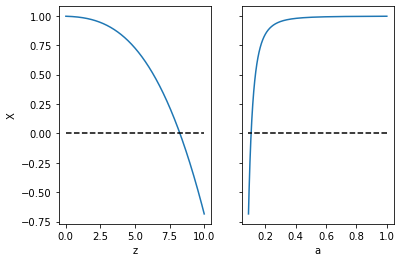

In [49]:
'''Plots of X(z): negative alpha'''
z = np.linspace(0, 10 , int(1e3))
a = 1/(1+z)
alpha_tilde = -1e-3


f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.plot(z,X(z , cosmo , alpha_tilde))
ax1.plot(z, np.zeros(len(z)), "--", color ="black")
ax2.plot(a,X((1/a) - 1,cosmo , alpha_tilde))
ax2.plot(a, np.zeros(len(a)), "--", color ="black")


ax1.set_ylabel('X')
ax1.set_xlabel('z')
ax2.set_xlabel('a')

plt.show()

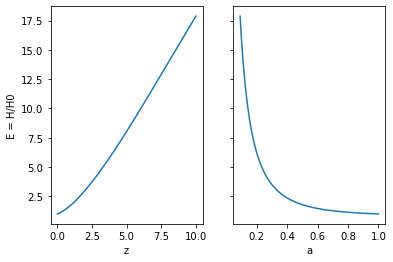

In [46]:
'''Plots of E(z)'''

z = np.linspace(0, 10 , int(1e3))
a = 1/(1+z)
alpha_tilde = 1e-3

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.plot(z,E(z , cosmo , alpha_tilde))
ax2.plot(a,E((1/a) - 1,cosmo , alpha_tilde))
    
ax1.set_ylabel('E = H/H0')
ax1.set_xlabel('z')
ax2.set_xlabel('a')

plt.show()

0.694908


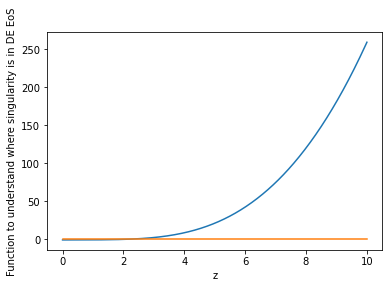

In [44]:
alpha_tilde = 1e-2
print(1 - 0.27 - 0.045 - 0 - 9.2e-5 + alpha_tilde)

funct = (alpha_tilde*(E((1/a) - 1,cosmo , alpha_tilde)) **4 - (1 - 0.27 - 0.045 - 0 - 9.2e-5 + alpha_tilde))
plt.plot(z, funct)
plt.plot(z, np.zeros(len(a)))
#plt.ylim(-1,10)
plt.xlabel("z")
plt.ylabel("Function to understand where singularity is in DE EoS")
plt.show()

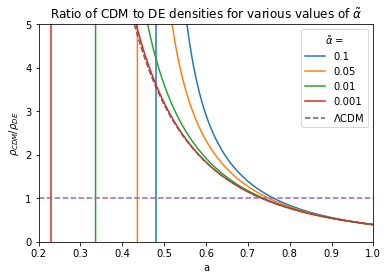

In [52]:
""" Plot FIG 1 Wang and Mota"""

alpha_tilde = 1e-1
plt.plot(a, rho_cdm_frac_rho_de((1/a) - 1, cosmo , alpha_tilde), label = alpha_tilde)

alpha_tilde = 5e-2
plt.plot(a, rho_cdm_frac_rho_de((1/a) - 1, cosmo , alpha_tilde), label = alpha_tilde)

alpha_tilde = 1e-2
plt.plot(a, rho_cdm_frac_rho_de((1/a) - 1, cosmo , alpha_tilde), label = alpha_tilde)

alpha_tilde = 1e-3
plt.plot(a, rho_cdm_frac_rho_de((1/a) - 1, cosmo , alpha_tilde), label = alpha_tilde)
    
plt.plot(np.linspace(0.0,1,int(1e2)), np.ones(int(1e2)), "--")

plt.plot(a, rho_cdm_frac_rho_de((1/a) - 1, cosmo , 0), "--", label = "$\Lambda$CDM")

plt.xlim(0.2,1)
plt.ylim(0,5)
plt.xlabel("a")
plt.ylabel(r"$ \rho_{CDM} / \rho_{DE} $")
plt.legend(title = r"$ \~\alpha $ = ")
plt.title(r"Ratio of CDM to DE densities for various values of $\~\alpha$")
#plt.savefig('Fig1_WandM_modified.pdf')
plt.show()

<ipython-input-2-e4ddefd586ac>:27: RuntimeWarning: invalid value encountered in sqrt
  ans = np.sqrt((np.sqrt(X(z , cosmo , alpha_tilde)) - 1)/(2 * alpha_tilde))
<ipython-input-2-e4ddefd586ac>:40: RuntimeWarning: invalid value encountered in sqrt
  (2 * E(z , cosmo , alpha_tilde) * np.sqrt(X(z , cosmo , alpha_tilde)))
<ipython-input-2-e4ddefd586ac>:27: RuntimeWarning: invalid value encountered in sqrt
  ans = np.sqrt((np.sqrt(X(z , cosmo , alpha_tilde)) - 1)/(2 * alpha_tilde))
<ipython-input-2-e4ddefd586ac>:40: RuntimeWarning: invalid value encountered in sqrt
  (2 * E(z , cosmo , alpha_tilde) * np.sqrt(X(z , cosmo , alpha_tilde)))


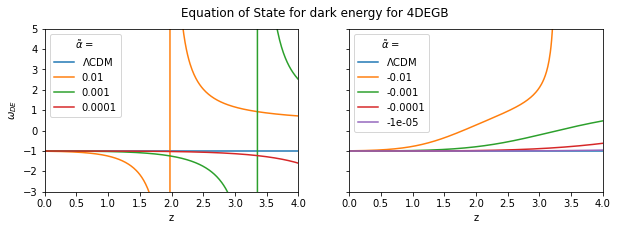

In [7]:
""" Plot FIG 2 Wang and Mota"""


f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 3))

ax1.plot(z , omega_de(z , cosmo , 0), label = "$\Lambda$CDM")
alpha_tilde = 1e-2
ax1.plot(z , omega_de(z , cosmo , alpha_tilde), label = alpha_tilde)
alpha_tilde = 1e-3
ax1.plot(z , omega_de(z , cosmo , alpha_tilde), label = alpha_tilde)
alpha_tilde = 1e-4
ax1.plot(z , omega_de(z , cosmo , alpha_tilde), label = alpha_tilde)


ax2.plot(z , omega_de(z , cosmo , 0), label = "$\Lambda$CDM")
alpha_tilde = -1e-2
ax2.plot(z , omega_de(z , cosmo , alpha_tilde), label = alpha_tilde)
alpha_tilde = -1e-3
ax2.plot(z , omega_de(z , cosmo , alpha_tilde), label = alpha_tilde)
alpha_tilde = -1e-4
ax2.plot(z , omega_de(z , cosmo , alpha_tilde), label = alpha_tilde)
alpha_tilde = -1e-5
ax2.plot(z , omega_de(z , cosmo , alpha_tilde), label = alpha_tilde)


ax1.set_xlim(0,4)
ax1.set_ylim(-3,5)
ax1.set_xlabel("z")
ax1.set_ylabel(r"$ \omega_{DE} $")
ax2.set_xlim(0,4)
ax2.set_xlabel("z")
ax1.legend(title = r"$ \~\alpha $ = ")
ax2.legend(title = r"$ \~\alpha $ = ")

f.suptitle("Equation of State for dark energy for 4DEGB")

#plt.savefig('Fig2_WandM_modified.pdf')
plt.show()

<ipython-input-2-e4ddefd586ac>:27: RuntimeWarning: invalid value encountered in sqrt
  ans = np.sqrt((np.sqrt(X(z , cosmo , alpha_tilde)) - 1)/(2 * alpha_tilde))
<ipython-input-2-e4ddefd586ac>:40: RuntimeWarning: invalid value encountered in sqrt
  (2 * E(z , cosmo , alpha_tilde) * np.sqrt(X(z , cosmo , alpha_tilde)))


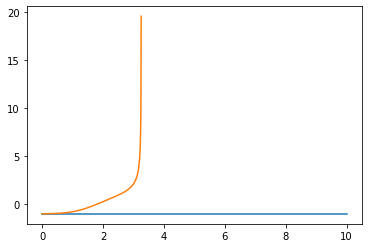

In [8]:
plt.plot(z , omega_de(z , cosmo , 0), label = "$\Lambda$CDM")
alpha_tilde = -1e-2
plt.plot(z , omega_de(z , cosmo , alpha_tilde), label = alpha_tilde)

<ipython-input-2-e4ddefd586ac>:27: RuntimeWarning: invalid value encountered in sqrt
  ans = np.sqrt((np.sqrt(X(z , cosmo , alpha_tilde)) - 1)/(2 * alpha_tilde))
<ipython-input-2-e4ddefd586ac>:40: RuntimeWarning: invalid value encountered in sqrt
  (2 * E(z , cosmo , alpha_tilde) * np.sqrt(X(z , cosmo , alpha_tilde)))


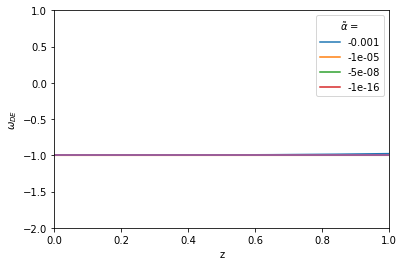

In [9]:
""" Plot FIG 2 Wang and Mota"""

alpha_tilde = -1e-3
plt.plot(z , omega_de(z , cosmo , alpha_tilde), label = alpha_tilde)
alpha_tilde = -1e-5
plt.plot(z , omega_de(z , cosmo , alpha_tilde), label = alpha_tilde)
alpha_tilde = -5e-8
plt.plot(z , omega_de(z , cosmo , alpha_tilde), label = alpha_tilde)
alpha_tilde = -1e-16
plt.plot(z , omega_de(z , cosmo , alpha_tilde), label = alpha_tilde)

plt.plot(z , omega_de(z , cosmo , 0))

plt.xlim(0,1)
plt.ylim(-2,1)
plt.xlabel("z")
plt.ylabel(r"$ \omega_{DE} $")
plt.legend(title = r"$ \~\alpha $ = ")
plt.show()